# (U.S.A Flights)
## by (Abdelrhman Hussam)

## Investigation Overview
Questions
1. What percentage of flights canceled and diverted ?
2. Which month is the most canceled flights ?
3. What are the most successful airports for flights?
4. Which month is the most diverted flights ?
5. What are the cities that receive the most successful flights?
6. What are the most successful flights in terms of distance ?
7. What are the most diverted flights in terms of distance ?

## Dataset Overview

> This data contains flights for a period starting from the first four months of the year, accompanied by many features that need to be analyzed in order to answer the questions raised to be answered accurately, and there are also some ideas that we want to try to find an explanation for through this analysis.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
data_2008 = pd.read_csv('2008.csv')
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('carriers.csv')

In [19]:
data = data_2008[['Month','DayofMonth','Origin','Dest','Distance','Cancelled','DepTime','AirTime','Diverted','DepDelay','ArrDelay','ActualElapsedTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','UniqueCarrier']]
data = pd.merge(data, airports, left_on='Origin', right_on='iata')

In [20]:
flight_cancel  = data[data['Cancelled'] == 1]
flights = data[data['Cancelled'] == 0]
flight_diverted = flights[flights['Diverted'] == 1]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Percentage of Canceled and Diverted Flights

> In the following figure, we can see the percentage of canceled flights 2.7% and diverted flights 0.24%

Text(0.5, 0, 'Diverted')

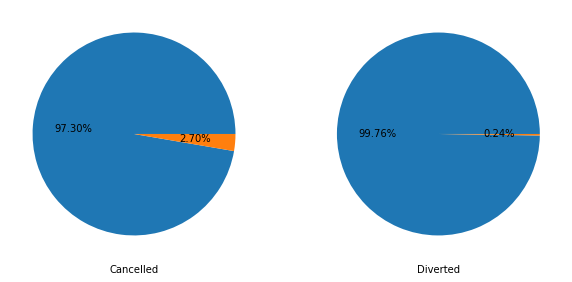

In [21]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.pie(data.Cancelled.value_counts(), autopct='%.2f%%');
plt.xlabel('Cancelled')

plt.subplot(1,2,2)
plt.pie(flights.Diverted.value_counts(), autopct='%.2f%%');
plt.xlabel('Diverted')

In [22]:
# This function plot the feature with it's frequancy in bar chart 
# under three condition are shown below

def plot_data_with_freq(x,y):
    plt.xlabel(x)
    plt.ylabel('Frequacny')
    
    if y == 'canceled':
        flight_cancel[x].value_counts()[:10].plot.bar(label=x,color='red')
    if y == 'diverted':
        flight_diverted[x].value_counts()[:10].plot.bar(label=x,color='blue')
    if y == None:
        flights[x].value_counts()[:10].plot.bar(label=x,color='green')
    plt.title("Distribution of {} with it's count".format(x))
    plt.legend()
    plt.grid(True)

## Some results for canceled flights

> It can be seen that most of the canceled flights were in February

> Most of the canceled flights would have traveled 733 miles

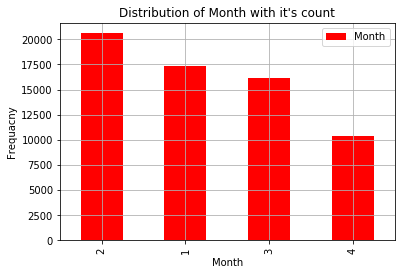

In [23]:
plot_data_with_freq('Month','canceled')

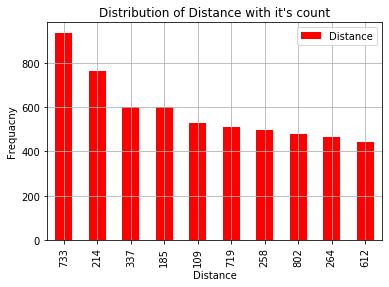

In [24]:
plot_data_with_freq('Distance','canceled')

## Some Results for Diverting Flights

> It can be seen that most of the diverted flights were in February

> Most of the diverted flights would have traveled 239 miles

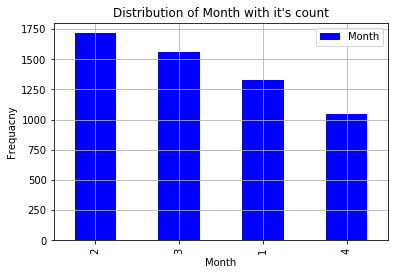

In [25]:
plot_data_with_freq('Month','diverted')

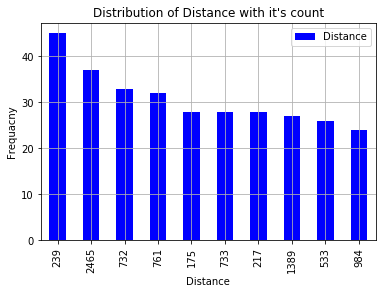

In [26]:
plot_data_with_freq('Distance','diverted')

## Some Results for Successful Flights

> It can be seen as an airport ATL is the most successful airport in terms of flights

> Most of the successful flights would have traveled 337 miles

> From the results it can be concluded that Chicago and Atlanta are the most visited city

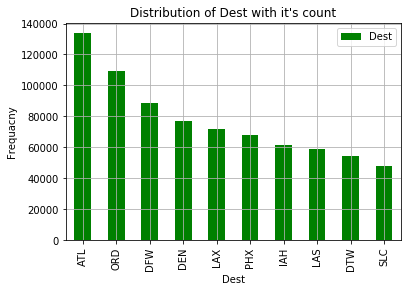

In [27]:
plot_data_with_freq('Dest',None)

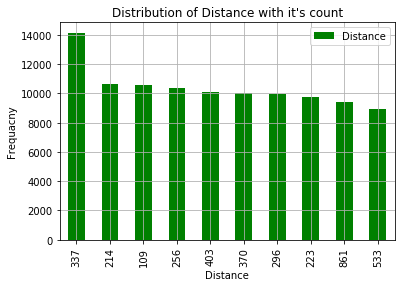

In [28]:
plot_data_with_freq('Distance',None)

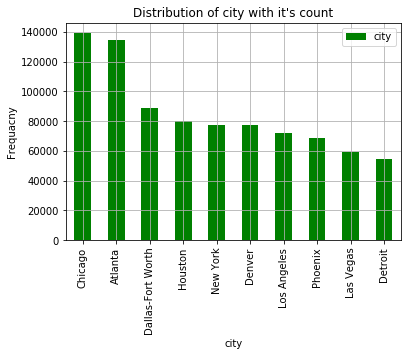

In [29]:
plot_data_with_freq('city',None)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!